In [3096]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot

In [3097]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [3098]:
df=pd.read_csv('./census.csv')
df=df.drop(columns=['Table Name', 'State Code', 'District Code','Division','Sub Division','Area Name','NCO Name'])
i = df[(df.Total_Rural_Urban == 'Total')].index
df = df.drop(i)

In [3099]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [3100]:
# df['Area Name']= label_encoder.fit_transform(df['Area Name'])
# df['NCO Name']= label_encoder.fit_transform(df['NCO Name'])
df['Total_Rural_Urban']= le.fit_transform(df['Total_Rural_Urban'])

In [3101]:
df.head()

,Total_Rural_Urban,Industrial Category _ Total _ Persons,Industrial Category _ Total _ Males,Industrial Category _ Total _ Females
1,0,72093419,55947277,16146142
2,1,108406577,88965906,19440671
4,0,1736556,1554600,181956
5,1,6027064,5397664,629400
7,0,462689,392286,70403


#Checking values in dataframe 

In [3102]:
df


,Total_Rural_Urban,Industrial Category _ Total _ Persons,Industrial Category _ Total _ Males,Industrial Category _ Total _ Females
1,0,72093419,55947277,16146142
2,1,108406577,88965906,19440671
4,0,1736556,1554600,181956
5,1,6027064,5397664,629400
7,0,462689,392286,70403
...,...,...,...,...
4169,1,7740,6763,977
4171,0,4917,4327,590
4172,1,5526,4596,930
4174,0,4917,4327,590


In [3103]:
df.head()

,Total_Rural_Urban,Industrial Category _ Total _ Persons,Industrial Category _ Total _ Males,Industrial Category _ Total _ Females
1,0,72093419,55947277,16146142
2,1,108406577,88965906,19440671
4,0,1736556,1554600,181956
5,1,6027064,5397664,629400
7,0,462689,392286,70403


In [3104]:
df.tail()

,Total_Rural_Urban,Industrial Category _ Total _ Persons,Industrial Category _ Total _ Males,Industrial Category _ Total _ Females
4169,1,7740,6763,977
4171,0,4917,4327,590
4172,1,5526,4596,930
4174,0,4917,4327,590
4175,1,5526,4596,930


In [3105]:
df.describe()

,Total_Rural_Urban,Industrial Category _ Total _ Persons,Industrial Category _ Total _ Males,Industrial Category _ Total _ Females
count,2784.00000,2.784000e+03,2.784000e+03,2.784000e+03
mean,0.50000,3.890086e+05,3.123129e+05,7.669572e+04
std,0.50009,2.784372e+06,2.252006e+06,5.511914e+05
min,0.00000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.00000,3.438000e+03,2.567000e+03,4.247500e+02
50%,0.50000,2.551850e+04,1.915450e+04,3.464500e+03
75%,1.00000,1.530855e+05,1.271932e+05,2.382475e+04
max,1.00000,1.084066e+08,8.896591e+07,1.944067e+07


In [3106]:
df.shape

(2784, 4)

In [3107]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# df['Industrial Category _ Total _ Persons'] = MinMaxScaler().fit_transform(np.array(df['Industrial Category _ Total _ Persons']).reshape(-1,1))

# df['Industrial Category _ Total _ Males'] = MinMaxScaler().fit_transform(np.array(df['Industrial Category _ Total _ Males']).reshape(-1,1))

# df['Industrial Category _ Total _ Females'] = MinMaxScaler().fit_transform(np.array(df['Industrial Category _ Total _ Females']).reshape(-1,1))

df = df.replace(0, np.nan)
df = df.fillna(df.mean())



df.head()


,Total_Rural_Urban,Industrial Category _ Total _ Persons,Industrial Category _ Total _ Males,Industrial Category _ Total _ Females
1,1.0,72093419.0,55947277.0,16146142.0
2,1.0,108406577.0,88965906.0,19440671.0
4,1.0,1736556.0,1554600.0,181956.0
5,1.0,6027064.0,5397664.0,629400.0
7,1.0,462689.0,392286.0,70403.0


In [3108]:
X = (df.iloc[:,1:-1].values)
mean = X.mean(axis = 0)
X -= mean 
X

array([[ 7.17032893e+07,  5.56338382e+07],
       [ 1.08016447e+08,  8.86524672e+07],
       [ 1.34642633e+06,  1.24116125e+06],
       ...,
       [-3.84603674e+05, -3.08842752e+05],
       [-3.85212674e+05, -3.09111752e+05],
       [-3.84603674e+05, -3.08842752e+05]])

In [3109]:
y =    (df.iloc[:,0:1].values)
y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [3110]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)



In [3111]:
model = Sequential()
model.add(Dense(50, input_dim=len(X[0,:]), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='tanh'))
opt = SGD(learning_rate=0.01)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])

In [3112]:
# model = Sequential()
# model.add(Dense(50, input_dim=len(X[0,:]), activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3113]:
# model = Sequential()
# model.add(Dense(40,activation = 'relu',input_dim = len(X[0,:])))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation = 'sigmoid'))

In [3114]:
# model.compile(optimizer= 'adam' , 
#               loss= keras.losses.binary_crossentropy, 
#               metrics=['accuracy'])

In [3115]:
history = model.fit( X_train, y_train, validation_data=(X_test, y_test),
           epochs=200,
           batch_size=85)

Epoch 1/200
23/23 [==============================] - 1s 15ms/step - loss: 0.0031 - accuracy: 0.9969 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 2/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.9969 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 3/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.9969 - val_loss: 0.0023 - val_accuracy: 0.9976
Epoch 4/200
23/23 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.9969 - val_loss: 0.0023 - val_accuracy: 0.9976
Epoch 5/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0030 - accuracy: 0.9969 - val_loss: 0.0023 - val_accuracy: 0.9976
Epoch 6/200
23/23 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 0.9969 - val_loss: 0.0023 - val_accuracy: 0.9976
Epoch 7/200
23/23 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 0.9969 - val_loss: 0.0023 - val_accuracy: 0.9976
Epoch 8/200


Train: 0.997, Test: 0.998


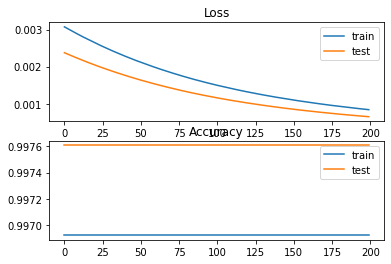

In [3116]:
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=106, epochs=100)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [3119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
model.predict([[1736556,15546000]])

1/1 [==============================] - 0s 45ms/step


array([[1.]], dtype=float32)

1 means Rural